# Init
Handling dependancied and importing datasets

In [1]:
try:
    import google.colab  # type: ignore # noqa: F401
    %pip install git+https://github.com/hackingmaterials/matbench
except ImportError:
    print("not in Colab")

not in Colab


In [2]:
!pip install git+https://github.com/hackingmaterials/matbench

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/hackingmaterials/matbench to c:\users\reka7605\appdata\local\temp\pip-req-build-o99xee2g
  Resolved https://github.com/hackingmaterials/matbench to commit 936176db18ca4cd7b38cbd957c017a5bac770c6b
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/hackingmaterials/matbench 'C:\Users\reka7605\AppData\Local\Temp\pip-req-build-o99xee2g'


In [3]:
pip install --user./matbench

Note: you may need to restart the kernel to use updated packages.



Usage:   
  c:\ProgramData\anaconda3\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  c:\ProgramData\anaconda3\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  c:\ProgramData\anaconda3\python.exe -m pip install [options] [-e] <vcs project url> ...
  c:\ProgramData\anaconda3\python.exe -m pip install [options] [-e] <local project path> ...
  c:\ProgramData\anaconda3\python.exe -m pip install [options] <archive url/path> ...

no such option: --user./matbench


In [4]:
pip install matbench

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:

from matbench.bench import MatbenchBenchmark
mb = MatbenchBenchmark(autoload=False)

C:\Users\reka7605\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


2024-10-16 14:05:20 INFO     Initialized benchmark 'matbench_v0.1' with 13 tasks: 
['matbench_dielectric',
 'matbench_expt_gap',
 'matbench_expt_is_metal',
 'matbench_glass',
 'matbench_jdft2d',
 'matbench_log_gvrh',
 'matbench_log_kvrh',
 'matbench_mp_e_form',
 'matbench_mp_gap',
 'matbench_mp_is_metal',
 'matbench_perovskites',
 'matbench_phonons',
 'matbench_steels']


In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Get first task

In [32]:
for task in mb.tasks:
  if task.dataset_name == "matbench_perovskites":
    print(task.dataset_name)
    break

mb.matbench_perovskites.load()

for fold in task.folds:

      # Inputs are either chemical compositions as strings
      # or crystal structures as pymatgen.Structure objects.
      # Outputs are either floats (regression tasks) or bools (classification tasks)
      train_inputs, train_outputs = task.get_train_and_val_data(fold)

matbench_perovskites
2024-10-16 14:07:51 INFO     Loading dataset 'matbench_perovskites'...
Fetching matbench_perovskites.json.gz from https://ml.materialsproject.org/projects/matbench_perovskites.json.gz to C:\Users\reka7605\AppData\Roaming\Python\Python310\site-packages\matminer\datasets\matbench_perovskites.json.gz


Fetching https://ml.materialsproject.org/projects/matbench_perovskites.json.gz in MB: 4.194304MB [00:00, 524.14MB/s]                


2024-10-16 14:07:55 INFO     Dataset 'matbench_perovskites loaded.


In [33]:
print(train_outputs)

mbid
mb-perovskites-00002    1.52
mb-perovskites-00003    1.48
mb-perovskites-00004    1.24
mb-perovskites-00005    0.62
mb-perovskites-00006    1.48
                        ... 
mb-perovskites-18922    0.88
mb-perovskites-18923    1.78
mb-perovskites-18924    1.66
mb-perovskites-18925    2.12
mb-perovskites-18926    1.50
Name: e_form, Length: 15143, dtype: float64


In [34]:
#from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

# figures inline in notebook
%matplotlib inline

#np.set_printoptions(suppress=True)

#DISPLAY_MAX_ROWS = 20  # number of max rows to print for a DataFrame
#pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

# Prepare the data

In [35]:
type(train_inputs)

pandas.core.series.Series

In [36]:
train_inputs[1]

C:\Users\reka7605\AppData\Local\Temp\ipykernel_4708\3789565351.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_inputs[1]


Structure Summary
Lattice
    abc : 4.292638763849676 4.292638763849676 4.292638763849676
 angles : 90.0 90.0 90.0
 volume : 79.09937085444218
      A : 4.292638763849676 0.0 0.0
      B : 0.0 4.292638763849676 0.0
      C : 0.0 0.0 4.292638763849676
    pbc : True True True
PeriodicSite: Re (0.6079, 0.0, 0.0) [0.1416, 0.0, 0.0]
PeriodicSite: As (2.187, 2.146, 2.146) [0.5094, 0.5, 0.5]
PeriodicSite: F (2.282, 0.0, 2.146) [0.5317, 0.0, 0.5]
PeriodicSite: O (1.32, 2.146, 0.0) [0.3075, 0.5, 0.0]
PeriodicSite: O (3.982, 2.146, 2.146) [0.9276, 0.5, 0.5]

In [37]:
train_outputs[1]

C:\Users\reka7605\AppData\Local\Temp\ipykernel_4708\727207955.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_outputs[1]


1.48

In [38]:
def extract_features(structure_data):
    lattice_params = structure_data.lattice.abc
    angles = structure_data.lattice.angles
    volume = structure_data.lattice.volume

    # Extract atomic coordinates and species
    atomic_coords = [site.frac_coords for site in structure_data.sites]
    atomic_species = [site.specie.Z for site in structure_data.sites]

    # Flatten atomic coordinates
    atomic_coords_flat = np.array(atomic_coords).flatten()

    # Ensure both atomic coordinates and species are of length 288
    max_length = 288
    atomic_coords_padded = np.zeros(max_length)
    atomic_species_padded = np.zeros(max_length)

    # Fill in with actual values up to their original lengths
    atomic_coords_padded[:len(atomic_coords_flat)] = atomic_coords_flat[:min(len(atomic_coords_flat), max_length)]
    atomic_species_padded[:len(atomic_species)] = atomic_species[:min(len(atomic_species), max_length)]

    # Concatenate features
    features = np.concatenate([lattice_params, angles, [volume], atomic_coords_padded, atomic_species_padded])

    return features



X = np.array([extract_features(structure) for structure in train_inputs])
y = np.array(train_outputs)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaler2 = StandardScaler()
y = scaler2.fit_transform(y.reshape(-1,1))
# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled ,y, test_size=0.2, random_state=42)

In [14]:
print(y)

[[-0.31342187]
 [-0.35917381]
 [-0.26001928]
 ...
 [ 0.17517294]
 [-0.27614721]
 [ 0.05885473]]


In [39]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

# Get explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

# Compute cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Determine how many PCs are needed to explain at least 80% or 90% of the variance
num_components_80 = np.argmax(cumulative_variance >= 0.80) + 1
num_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

print(f'Number of components to explain 80% of the variance: {num_components_80}')
print(f'Number of components to explain 90% of the variance: {num_components_90}')


Number of components to explain 80% of the variance: 9
Number of components to explain 90% of the variance: 12


In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 2: Apply PCA to reduce the dimensionality of X
pca = PCA(n_components=num_components_80) 
X_pca = pca.fit_transform(X_scaled)

# Step 3: Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions on the validation set
y_pred = model.predict(X_val)

# Step 6: Evaluate the model's performance
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"Mean square error {mse}")
print(f"R² Score: {r2}")

# Optional: Display some predictions alongside actual values
print("First 5 predictions and actual values:")
print("Predicted: ", y_pred[:5])
print("Actual: ", y_val[:5])

Mean square error 0.7317242231611455
R² Score: 0.26962249123544435
First 5 predictions and actual values:
Predicted:  [[-0.38683576]
 [-0.41462367]
 [-0.11830315]
 [-0.15536732]
 [ 0.27199036]]
Actual:  [[-1.44026567]
 [-0.58010587]
 [-0.4725859 ]
 [-0.84890581]
 [ 0.36069391]]


In [17]:
min(y_pred)

array([-1.09690431])

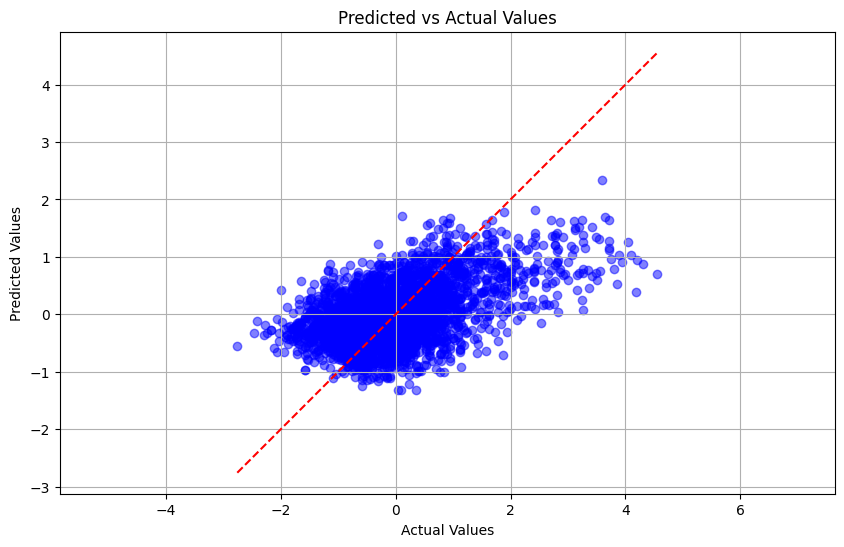

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')  # Diagonal line
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.xlim(y_val.min() - 1, y_val.max() + 1)  # Adjust x limits for better visualization
plt.ylim(y_val.min() - 1, y_val.max() + 1)  # Adjust y limits for better visualization
plt.axis('equal')  # Set equal scaling
plt.show()

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the data (you have already done this)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Step 2: Apply PCA
pca = PCA(n_components=16)
X_reduced = pca.fit_transform(X_scaled)
pca_y = PCA(n_components=16)  # Set this to the number of components you want
y_reduced = pca.fit_transform(y_train)
# Step 3: Split the reduced data into train and validation sets
X_train_reduced, X_val_reduced, y_train, y_val = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

ValueError: n_components=16 must be between 0 and min(n_samples, n_features)=1 with svd_solver='covariance_eigh'

In [ ]:
model = LinearRegression()
model.fit(X_train_reduced, y_train)

# Step 4: Make predictions on the validation set
y_pred = model.predict(X_val_reduced)

# Step 5: Evaluate the model performance
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Optional: Display some predictions alongside actual values
print("First 5 predictions and actual values:")
print("Predicted: ", y_pred[:5])
print("Actual: ", y_val[:5])

In [ ]:
X.shape

In [ ]:
y[0]

# ML

In [ ]:
def build_model(input_shape):
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu', input_dim=583))#input_shape=(,7)))
    layers.Dropout(0.5),
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    #model.add(layers.Dense(1))  # Output layer for regression
    print(model.summary())
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

In [ ]:
# Build and train the Keras model
model = build_model(X_train.shape[1])


history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Get test data and extract features
test_inputs = task.get_test_data(fold, include_target=False)
X_test = np.array([extract_features(structure) for structure in test_inputs])
X_test_scaled = scaler.transform(X_test)

# Predict on the testing data
predictions = model.predict(X_test_scaled)



train_loss = history.history["loss"][1:]
test_loss = history.history["val_loss"][1:]

In [ ]:
# Prepare and plot loss over time
plt.plot(train_loss,label="train")
plt.plot(test_loss,label="test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()